In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
train = pd.read_csv('../data/split/train.csv')
test = pd.read_csv('../data/split/test.csv')
unseen = pd.read_csv('../data/raw/unseen.csv')

# Missing Values

In [100]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [101]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             37
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
dtype: int64

In [102]:
unseen.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Age'>

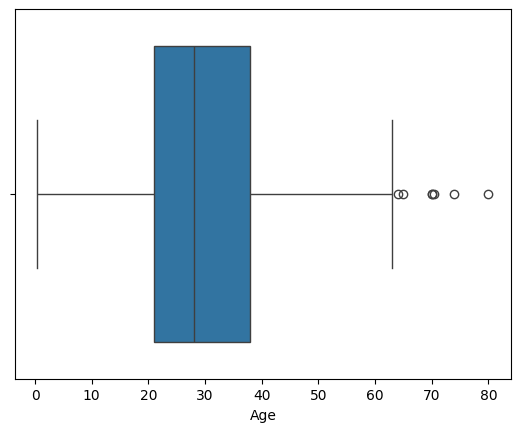

In [103]:
sns.boxplot(x=train['Age'])

<Axes: xlabel='Fare'>

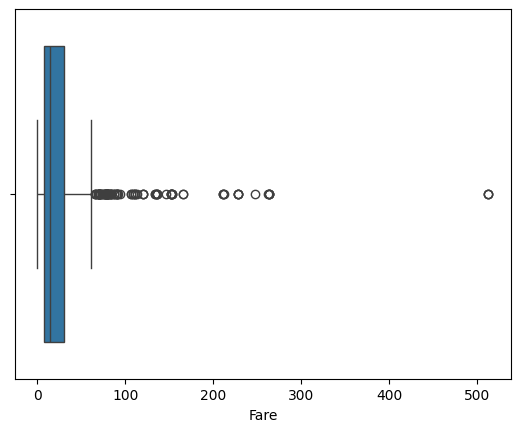

In [104]:
sns.boxplot(x=train['Fare'])

In [105]:
title = train['Name'].str.extract(r'\b(\w+)\.')
title.value_counts()

0       
Mr          419
Miss        143
Mrs          96
Master       33
Dr            5
Rev           5
Col           2
Mlle          2
Major         2
Capt          1
Lady          1
Countess      1
Mme           1
Ms            1
Name: count, dtype: int64

In [106]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title in ['Ms', 'Mlle']:
        return 'Miss'
    elif title in ['Mme', 'Lady', 'Dona']:
        return 'Mrs'
    else:
        return 'Rare' 

In [107]:
train['Title'] = train['Name'].apply(extract_title)
test['Title'] = test['Name'].apply(extract_title)
unseen['Title'] = unseen['Name'].apply(extract_title)

In [108]:
train['Title'].value_counts()

Title
Mr        419
Miss      146
Mrs        98
Master     33
Rare       16
Name: count, dtype: int64

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,Mr
1,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,Mr
2,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,Mr
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,Mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Miss


In [110]:
title_median = train.groupby('Title')['Age'].median()
embarked_mode = train['Embarked'].mode()[0]
fare_median = train['Fare'].median()

In [111]:
def fill_missing_values(df):

    def fill_age(row):
        if pd.isna(row['Age']):
            return title_median[row['Title']]
        else:
            return row['Age']
    df['Age'] = df.apply(fill_age, axis=1)

    df['Embarked'].fillna(embarked_mode, inplace=True)

    df['Fare'].fillna(fare_median, inplace=True)

    return df

In [112]:
train = fill_missing_values(train)
test = fill_missing_values(test)
unseen = fill_missing_values(unseen)

C:\Users\66959\AppData\Local\Temp\ipykernel_13236\3574679059.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode, inplace=True)
C:\Users\66959\AppData\Local\Temp\ipykernel_13236\3574679059.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# Outliers

In [113]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

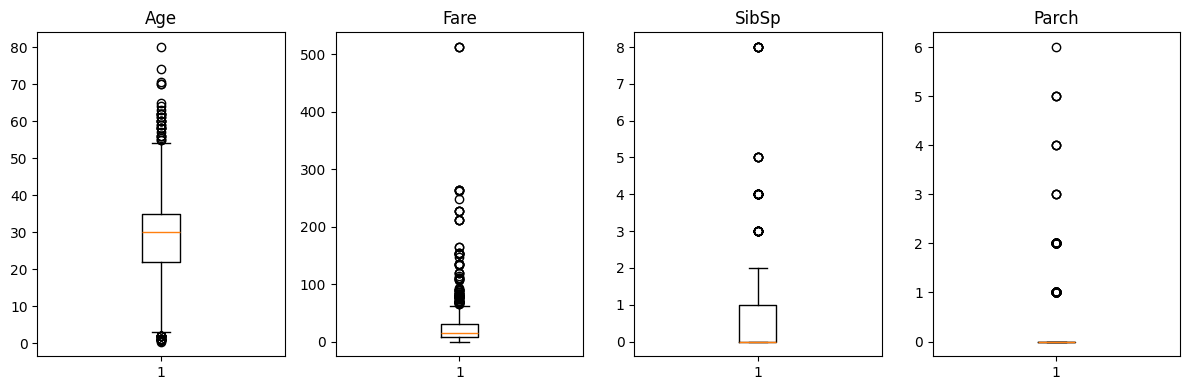

In [114]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(1, len(num_cols), figsize=(12, 4))

for ax, col in zip(axes, num_cols):
    ax.boxplot(train[col].dropna())
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [115]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         0
Title            0
dtype: int64

In [116]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
Title            0
dtype: int64

In [117]:
unseen.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [118]:
train.to_csv('../data/cleaned/cleaned_train.csv', index=False)
test.to_csv('../data/cleaned/cleaned_test.csv', index=False)
unseen.to_csv('../data/cleaned/cleaned_unseen.csv', index=False)